# Marketing Campaign for Banking Products

### Data Description:

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Data: ​ https://www.kaggle.com/itsmesunil/bank-loan-modelling/

### Context:

The bank has a growing customer base. This project is about a bank whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

### Attribute Information:

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer in dollars
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month in dollars
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage (if any) in dollars
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

### Steps and tasks:

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc
2. Check if you need to clean the data for any of the variables
3. EDA: Study the data distribution in each attribute and target variable, share your findings.
        - Number of unique in each column?
        - Number of people with zero mortgage?
        - Number of people with zero credit card spending per month?
        - Value counts of all categorical columns.
        - Univariate and Bivariate analysis
4. Apply necessary transformations for the feature variables
5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively
6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.
7. Print all the metrics related for evaluating the model performance
8. Build various other classification algorithms and compare their performance
9. Give a business understanding of your model

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc

In [1]:
#importing requires Libraries
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ls

48024_87370_bundle_archive.zip
Bank_Loan_Modelling.ipynb
Bank_Loan_Modelling_Project.ipynb
Bank_Personal_Loan_Modelling.csv
Bank_Personal_Loan_Modelling.xlsx
ML-Project-2-Marketing-Campaign-for-Banking-Products-3.pdf
README.md
Untitled.ipynb


In [3]:
#Reading the data from csv file
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#viewing the first 5 rows of the dataset
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
#Shape of the dataset (No of observations, No of features)
df.shape

(5000, 14)

In [6]:
#Checking the datatypes of the features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Inference:
-  There are no non-numerical Datatype/ Values.
-  Categorical data has been Label encoded.

In [7]:
#Printing the Features names
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
#Checking for null values in the dataset
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

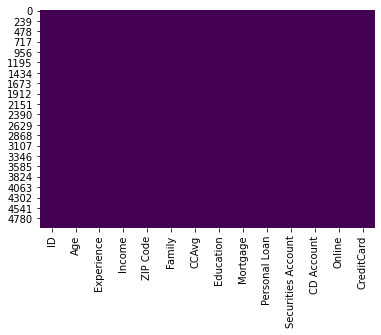

In [9]:
#Visualising the distribution of null Values
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

### Inference

- No null values in the dataset

# 2. Check if you need to clean the data for any of the variables

In [10]:
#Various Statistical Measures on input data such as mean, standard deviation, minimum value, maximum value
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Inference:
-  Count for every column is 5000, therefore no null values.
-  Experience has a minimum value of -3 which is not possible.

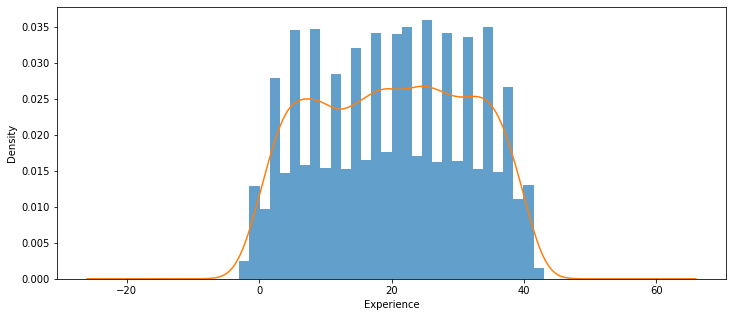

In [14]:
#checking the distribution of age
ax = df['Experience'].hist(bins = 30, density = True, stacked = True, alpha = 0.7, figsize = (12, 5))
df['Experience'].plot(kind = 'density')
ax.set_xlabel('Experience')
plt.show()

In [15]:
#Counting Experience values less than 0
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [16]:
df[df['Experience'] < 0]['Experience'].count()

52

### Inference
- We have found negative values for attribute 'Experience' in the given dataset
- There are 52 such values less than 0, namely 33 of them are -1, 15 of them are -2 and 4 are of them are -3.
- So, we consider experience to be greater than or equal to 0 and hence we clean it and make them 0

#### Cleaning the Data

In [17]:
#Getting Valid data from the dataset
correct_data = df[df['Experience'] > 0]

In [18]:
(correct_data['Experience']<0).sum()

0

In [19]:
#Getting all those IDs for which experience is less than 0
ID = df.loc[df.Experience < 0]['ID'].tolist()

In [20]:
len(ID)

52

In [21]:
#Replacing all those values of Experience less than 0 with 0
median_val = df['Experience'].median()
for id in ID:
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = median_val

In [22]:
df[df['Experience'] < 0]['Experience'].count()

0

### Inference:
- No Negative Values found.
- Cleaned the data.

# 3. EDA: Study the data distribution in each attribute and target variable, share your findings.

### Number of unique in each column

In [20]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Number of people with zero mortgage

In [21]:
(df['Mortgage'] == 0).sum()

3462

### Number of people with zero credit card spending per month

In [22]:
(df['CCAvg'] == 0).sum()

106

### Value counts of all categorical columns

In [23]:
CAT = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for column in CAT:
    print(df[column].value_counts())
    

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


### Univariate and Bivariate analysis

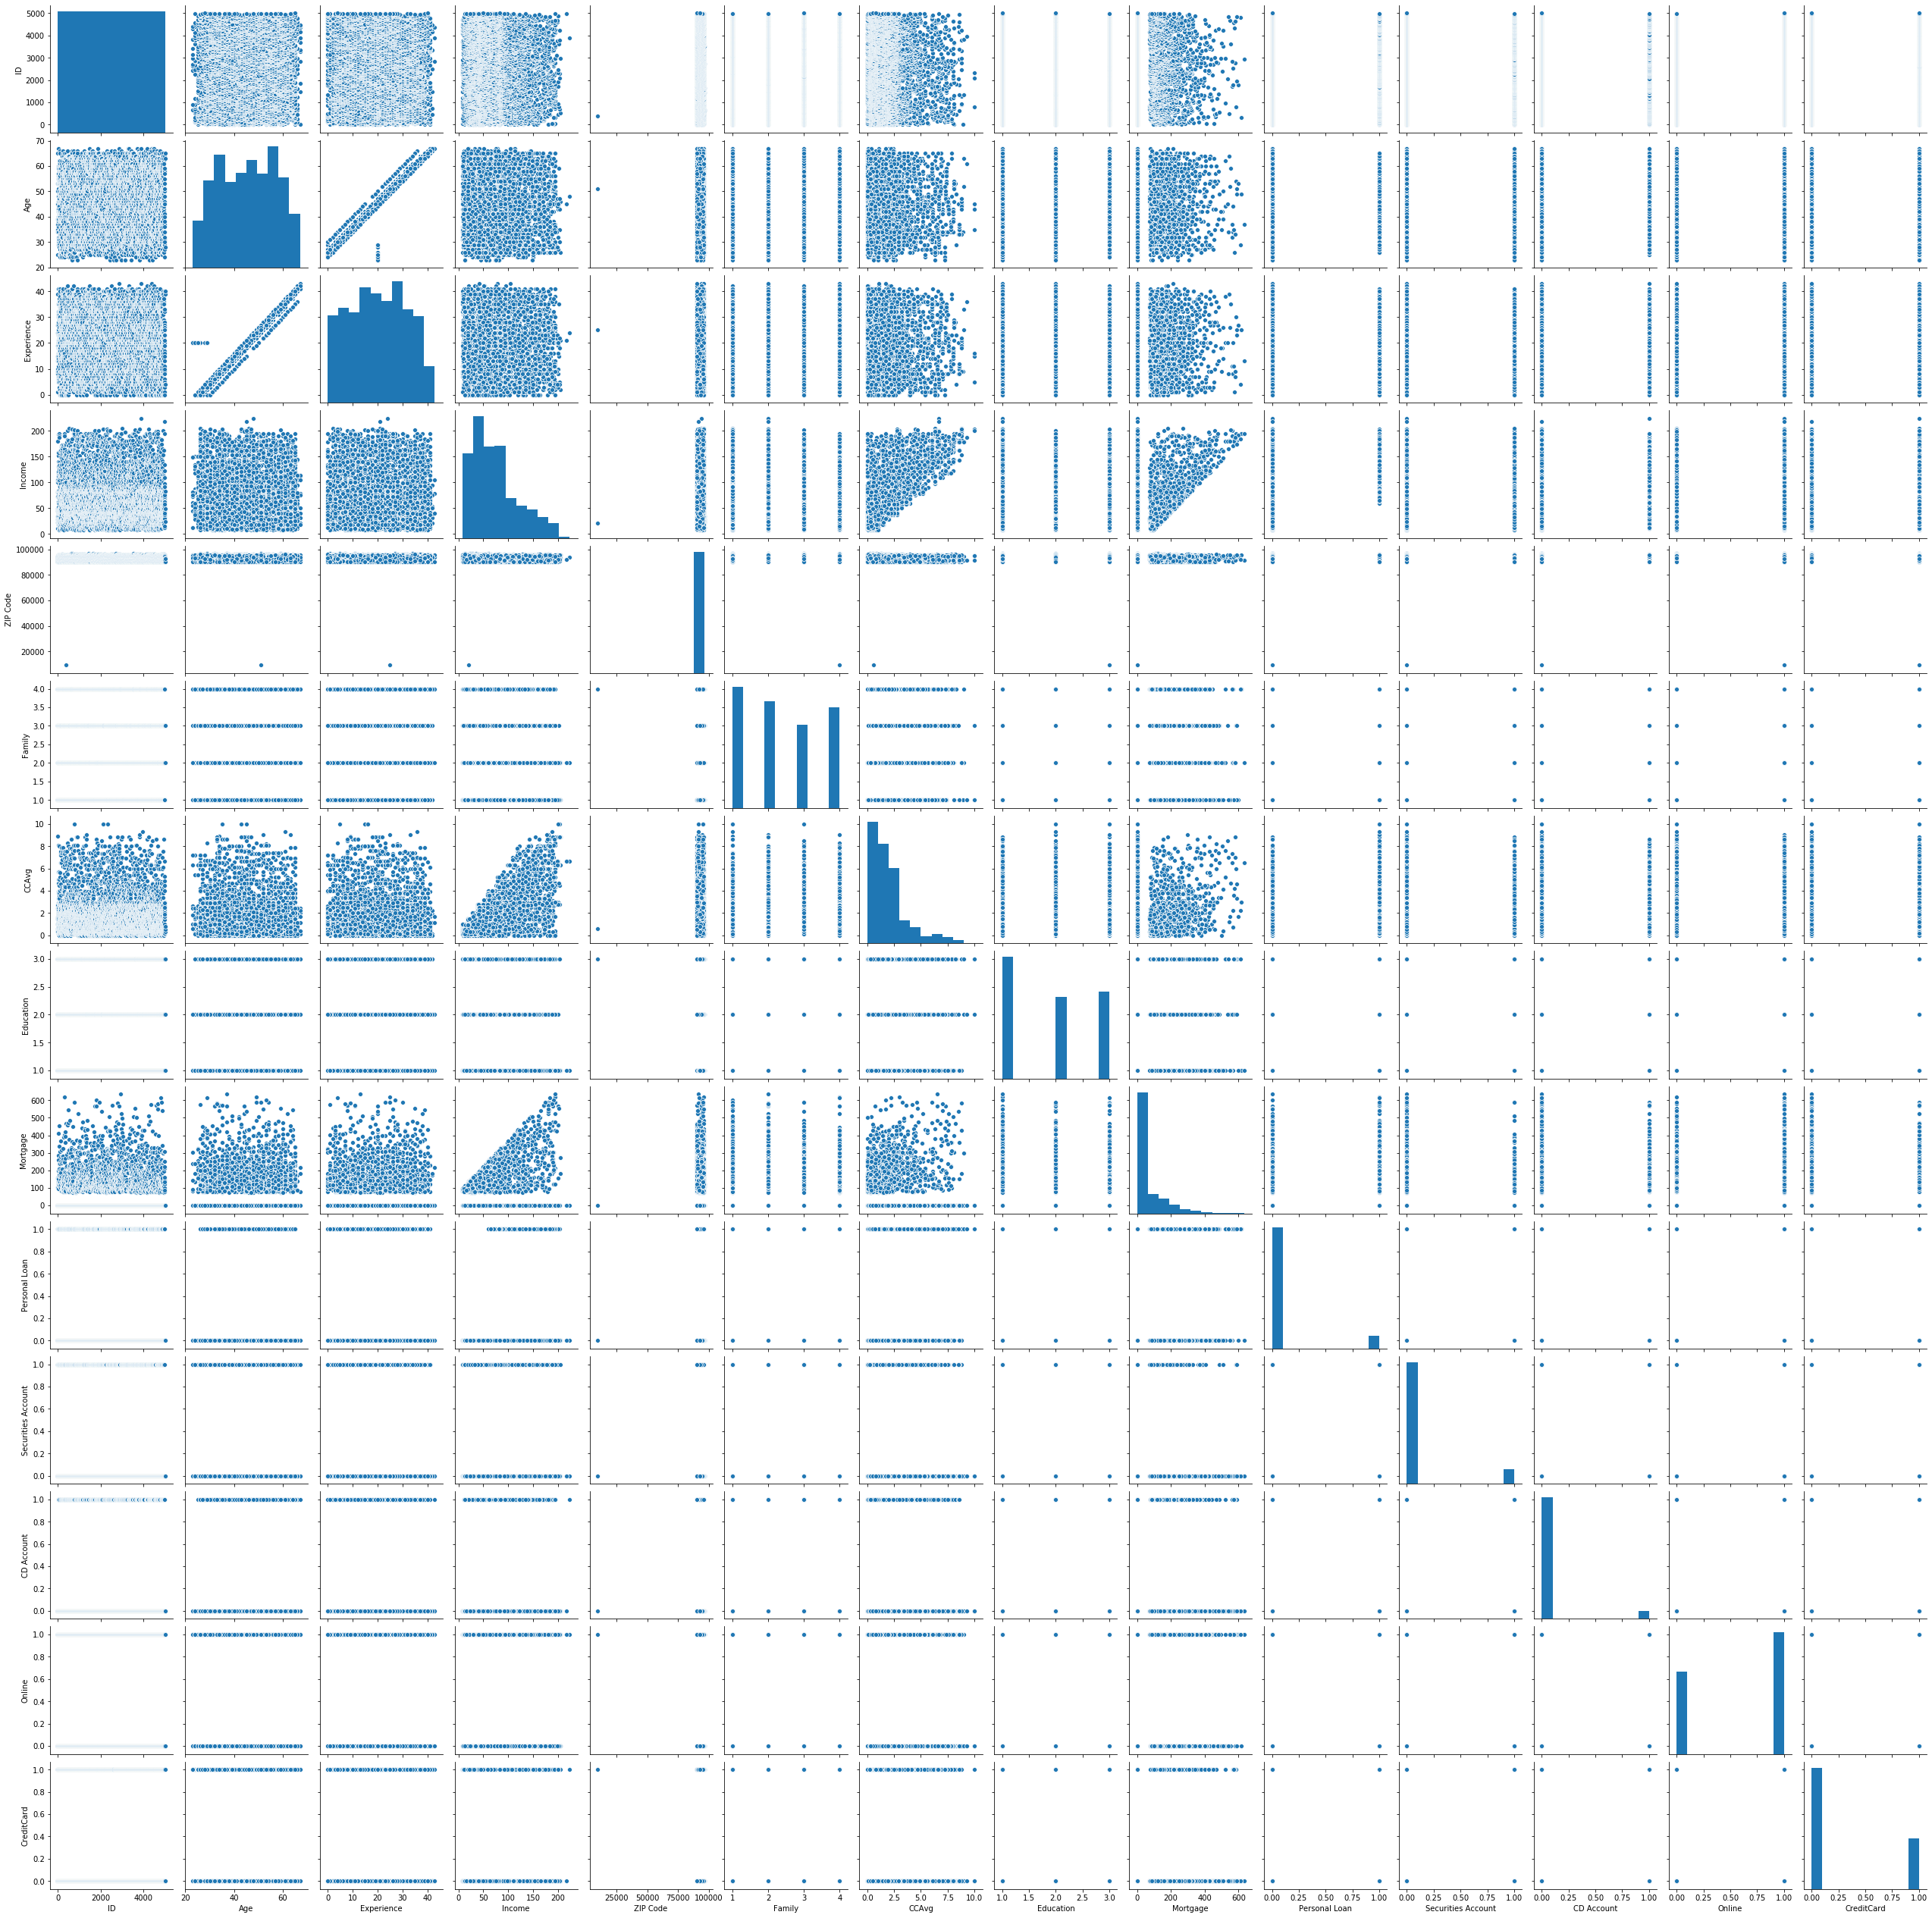

In [23]:
sns.pairplot(df)

From the above plot, on a closer look, we could find the relationships between all the features

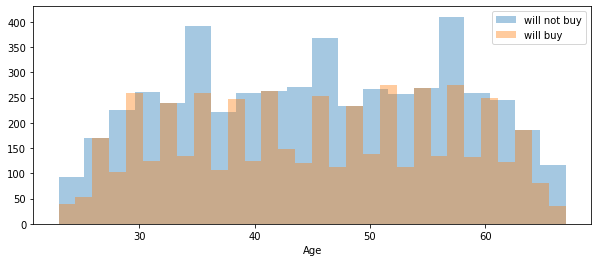

In [172]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 4))
ax = sns.distplot(df.Age.dropna(), bins = 20, label = 'will not buy', ax = axes, kde = False)
ax = sns.distplot(df.Age.dropna(), bins = 30, label = 'will buy', ax = axes, kde = False)
plt.legend()
plt.show()

### Inference:
- Ages of those who will buy loan and those who will not buy loan are distributed between (23, 67)

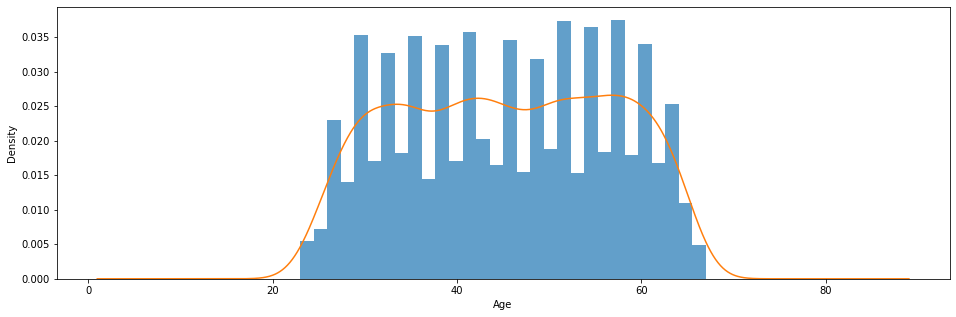

In [26]:
#checking the distribution of age
ax = df['Age'].hist(bins = 30, density = True, stacked = True, alpha = 0.7, figsize = (16, 5))
df['Age'].plot(kind = 'density')
ax.set_xlabel('Age')
plt.show()

### Inference:
- Age is distributed between 20 and 70.

In [27]:
#Knowing the count of those who will get and who will not get a loan
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

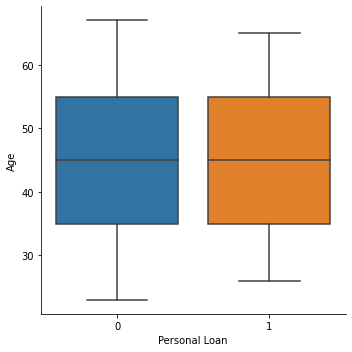

In [28]:
sns.catplot(x = 'Personal Loan', y = 'Age', data = df, kind = 'box')

<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

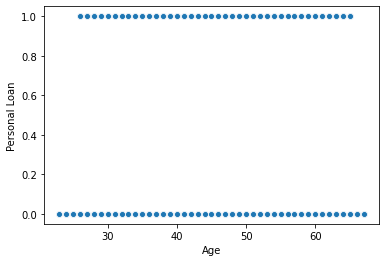

In [29]:
sns.scatterplot(x = 'Age', y = 'Personal Loan', data = df)

### Inference from above two plots
- Loan buyers age will be from around 25 to 70.
- Mean for both loan buyers and non loan buyers are equal.

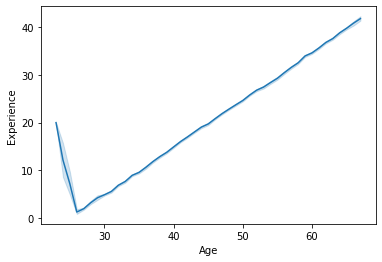

In [24]:
sns.lineplot(x = 'Age', y = 'Experience', data = df)

### Inference
From the above plot, we could see that as age increases experience increases

In [31]:
df[df['Family'] == 1]['Income'].mean()

78.62228260869566

In [32]:
df[df['Family'] == 2]['Income'].mean()

84.2391975308642

In [33]:
df[df['Family'] == 3]['Income'].mean()

66.9049504950495

In [34]:
df[df['Family'] == 4]['Income'].mean()

62.51309328968903

### Inference
- Respective mean of the income earned according to the family size has been found from the above operations.

<AxesSubplot:>

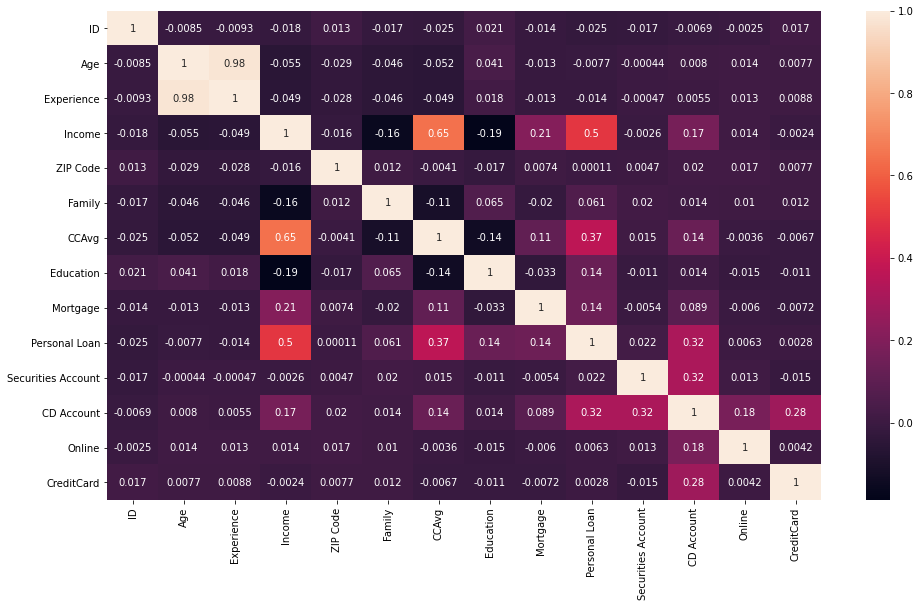

In [35]:
corr = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot = True)

### Inference
- Experience and Age are highly correlated with eachother.
- Income and CCAvg are moderately correlated with each other.
- One feature among Exerience and age can be removed to avoid multi-colinearity issue

<AxesSubplot:xlabel='Online', ylabel='Income'>

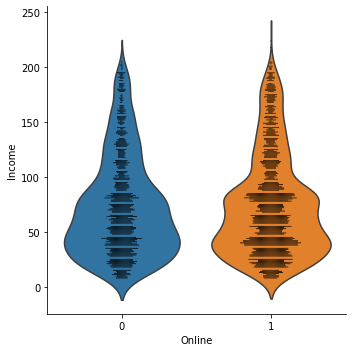

In [36]:
g = sns.catplot(x = 'Online', y = 'Income', data = df, kind = 'violin', inner = None)
sns.swarmplot(x = 'Online', y = 'Income', color = 'k', size = 1, ax = g.ax, data = df)

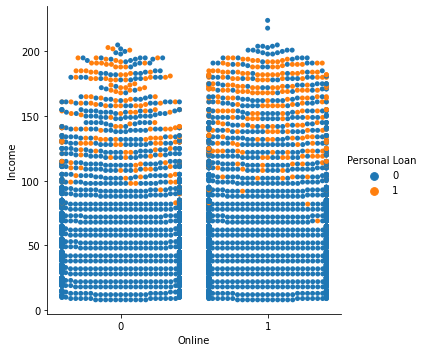

In [37]:
sns.catplot(x = 'Online', y = 'Income', data = df, kind = 'swarm', hue = 'Personal Loan')

### Inference

Following observations have been inferred from the above plots: 
- Majority of income earned is around 50
- Income with more than 100 is more likely to get a loan

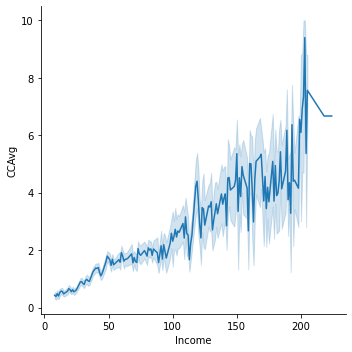

In [38]:
sns.relplot(x = 'Income', y = 'CCAvg', data = df, kind = 'line')

### Inference
- As Income increases CCAvg increases

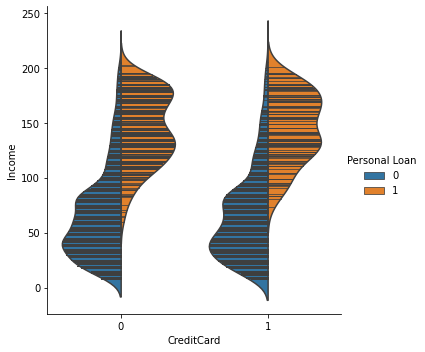

In [39]:
sns.catplot(x = 'CreditCard', y = 'Income', data = df, hue = 'Personal Loan', kind = 'violin',
             split = True,inner = 'stick')

### Inference
- Irrespective of whether a person is having CreditCard or not, if his Income is more than around 100 then is more likely to get a loan

<AxesSubplot:xlabel='Education', ylabel='Income'>

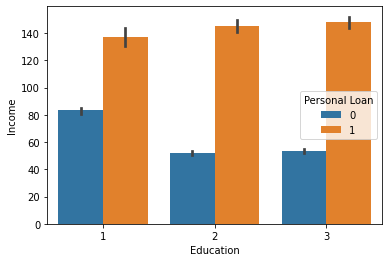

In [40]:
sns.barplot(x = 'Education', y = 'Income', data = df, hue = 'Personal Loan')

### Inference
- Undergraduates are less likely to get a loan than a graduate or professional 

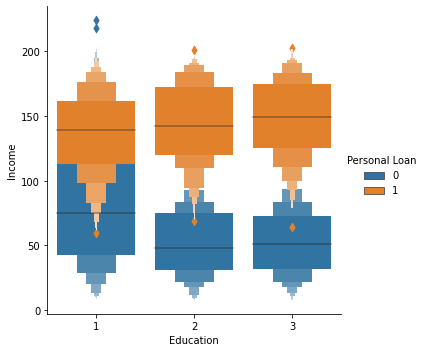

In [41]:
sns.catplot(x = 'Education', y = 'Income', kind = 'boxen', data = df, hue = 'Personal Loan', dodge = False)

### Inference
 - Undergraduates are likely to get more income, that is fresh talents are getting rewarded more and also as infered before if the income is more than 100 then most likely loan will be given.

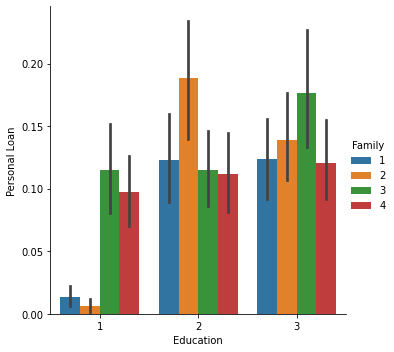

In [42]:
sns.catplot(x = 'Education', y = 'Personal Loan', data = df, kind = 'bar', hue = 'Family')

### Inference
From the above plot we can see that,
- an undergraduate with family size 1 is less likely to get a loan
- a graduate with family size 2 and a professional with a family size 3 are more likely to get a loan 

<AxesSubplot:>

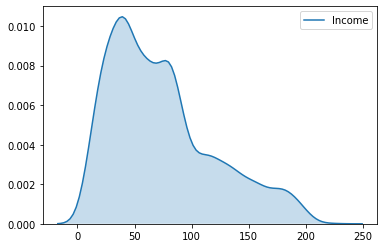

In [43]:
sns.kdeplot(df['Income'], shade = True)

### Inference:
From the above plot, we can infer that most of the income lies near 50

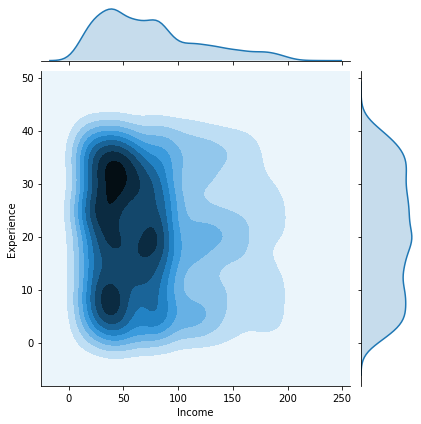

In [44]:
x = df['Income']
y = df['Experience']
sns.jointplot(x, y, kind = 'kde')
plt.show()

### Inference
- Unlike the distribution of income, the given dataset has equal distribution of the experience a person has.

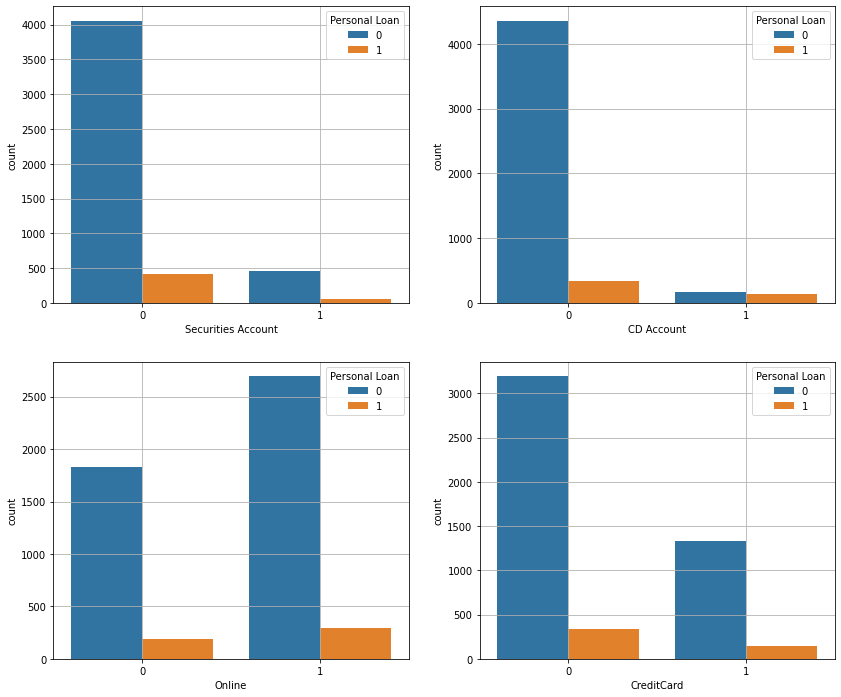

In [45]:
# Plotting Counts plot for Categorical features:
col=['Securities Account','CD Account','Online','CreditCard']
plt.figure(figsize=(14,12))
j=2
k=0
for i in col:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan', data=df)
    k=k+1
    plt.grid(True)
plt.show()

### Inference:
- People without the CD Accounts tend to have taken more Personal Loan. 
- People with more Online accounts seem to take more Personal Loan
- Very minimal number of people who have Securities Account have opted the Personal Loan.
- Most of the people with the CreditCard seems to have not taken the Personal Loan.

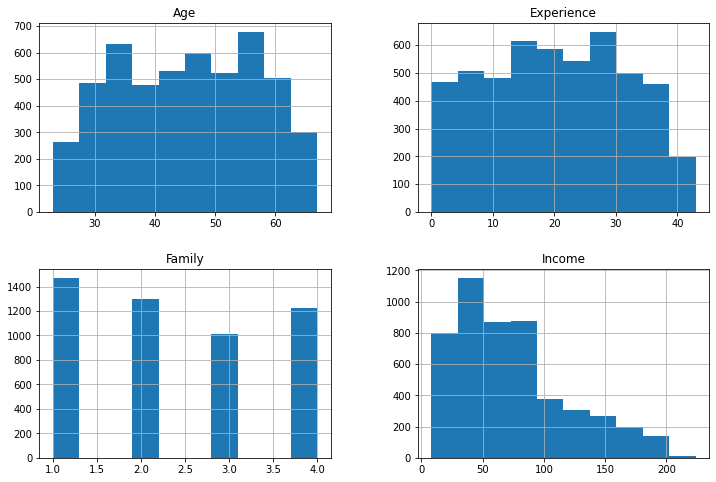

In [46]:

#Histogram plots.
features = ['Age', 'Experience', 'Family','Income']
df[features].hist(figsize=(12, 8))
plt.show()

### Inference
These plots show us the data distribution of the input data


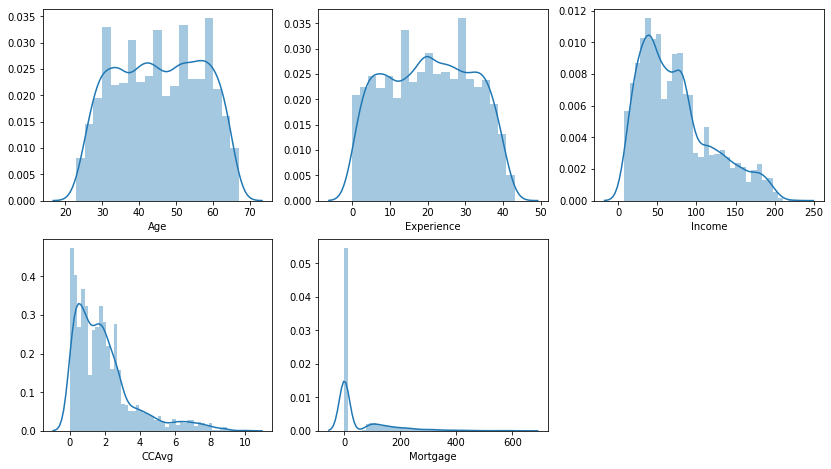

<Figure size 432x288 with 0 Axes>

In [47]:
#Distribution plots.
col=['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(df[k])
    j=j+1
plt.show()
plt.tight_layout()




### Inference:
From Distribution plots, we can observe the following conclusions
- Age: The distribution is even across mean and hence normally distributed.
- Experience: Even distribution across mean and hence normally distributed.
- Income: Positively skewed that is median is lesser than the mean value.
- CCAvg: Positively skewed that is median is lesser than the mean value.
- Mortgage: Positively skewed that is median is lesser than the mean value.

# 4. Apply necessary transformations for the feature variables

<AxesSubplot:xlabel='Income'>

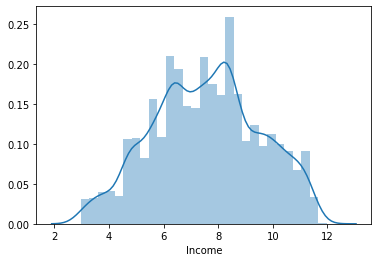

In [48]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize = False)
df['Income'] = pt.fit_transform(df['Income'].values.reshape(-1, 1))
sns.distplot(df['Income'])

In [49]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize = False)
df['CCAvg'] = pt.fit_transform(df['CCAvg'].values.reshape(-1, 1))


<AxesSubplot:xlabel='CCAvg'>

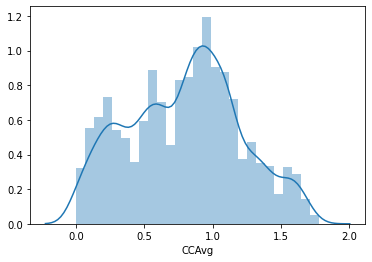

In [50]:
sns.distplot(df['CCAvg'])

In [51]:
df['Mortgage'] = pd.cut(df['Mortgage'], 
                        bins = [0, 100, 200, 300, 400, 500, 600, 700],
                        labels = [0, 1, 2, 3, 4, 5, 6],
                        include_lowest = True)

In [211]:
params = ['Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [212]:
X = np.array(df[params])

In [213]:
X.shape

(5000, 10)

In [214]:
y = np.array(df['Personal Loan'])
y.shape

(5000,)

<AxesSubplot:xlabel='Mortgage'>

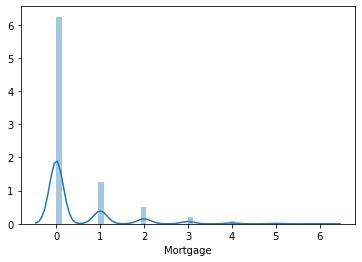

In [215]:
sns.distplot(df['Mortgage'])

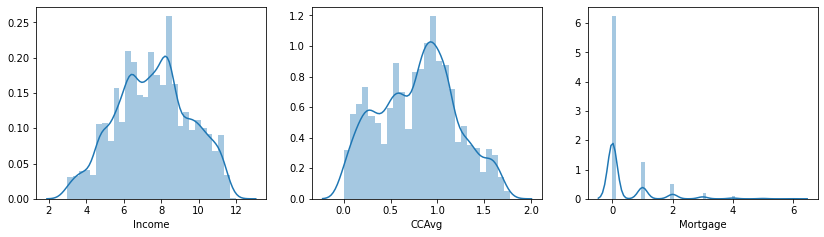

<Figure size 432x288 with 0 Axes>

In [216]:
col=['Income', 'CCAvg','Mortgage']

i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(df[k])
    j=j+1
plt.show()
plt.tight_layout()


In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

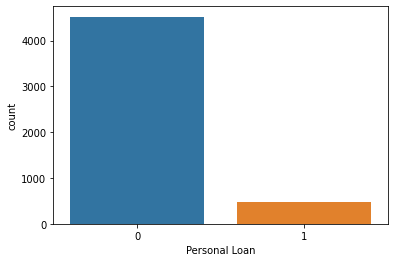

In [218]:
sns.countplot(x='Personal Loan', data=df)

# 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3500, 10), (3500,), (1500, 10), (1500,))

# 6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [222]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

#fitting the Logistic Regression Model to training data
log_model.fit(X_train, y_train)

#predicting the output
y_pred = log_model.predict(X_test)

In [223]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, y_pred)

array([[1338,   18],
       [  50,   94]])

In [224]:
log_model.score(X_test, y_test)

0.9546666666666667

### For Logistic Regression

In [225]:
print('Training Accuracy is ',round(log_model.score(X_train, y_train)*100, 2),
      '% \nTest Accuracy is ', round(log_model.score(X_test, y_test)*100, 2),'%')

Training Accuracy is  95.63 % 
Test Accuracy is  95.47 %


# 7. Print all the metrics related for evaluating the model performance

In [226]:
from sklearn.metrics import accuracy_score, r2_score, log_loss, classification_report, f1_score
from sklearn.metrics import mean_absolute_error, precision_score,recall_score, roc_auc_score, auc, roc_curve
from sklearn.metrics import mean_squared_error, precision_recall_curve

### Metrics Evaluated:
1. Precision-Recall curve
2. ROC-AUC curve
3. Precision
4. Recall
5. Accuracy
6. Log loss
7. Area under curve for both ROC and precision-recall curves
8. Classification Report
9. Confusion Matrix

In [227]:
def draw_cm(test_data, pred_data):
    c = cm(test_data, pred_data)
    sns.heatmap(c, annot = True, fmt = 'd', xticklabels = [0, 1], yticklabels = [0, 1])
    plt.ylabel('Observed')
    plt.xlabel('Calculated')
    plt.show()

In [228]:
y_predict_prob = log_model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_prob)

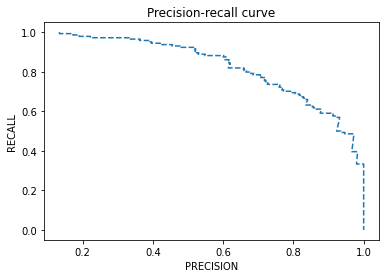

In [229]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for logistic regression')

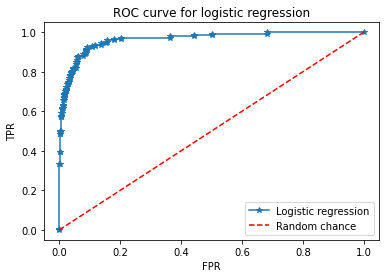

In [230]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression')

In [231]:
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test,y_pred))
print('Auc of ROC Curve: ',auc(fpr,tpr))
print('Auc of precision & recall: ',auc(recall,precision))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
log_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

precision: 0.8392857142857143
recall: 0.6527777777777778
Accuracy:  0.9546666666666667
Log loss:  1.565767458405114
Auc of ROC Curve:  0.965738692232055
Auc of precision & recall:  0.8419277896981628
Mean Squared Error (MSE):  0.04533333333333334
Mean Absolute Error (MAE):  0.04533333333333334
F1 Score:  0.734375


In [232]:
log_list

[0.839, 0.653, 0.734, 0.955, 0.045]

In [233]:
# Classification Report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.98      1356
     class 1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



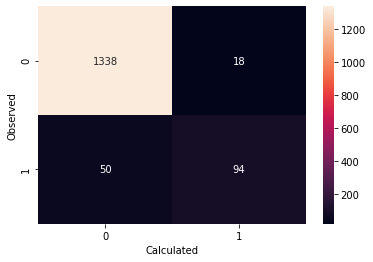

In [234]:
draw_cm(y_test,y_pred)

# 8. Build various other classification algorithms and compare their performance

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Various Classification Algorithms include:
1. Decision Tree
2. Random Forest
3. Naive bayes
4. KNN

Models have been trained and found the accuracy of each model.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Decision Tree Classifier Algorithm

In [245]:
DT_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=8)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [246]:
y_pred= DT_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [247]:
DT_model.score(X_train, y_train), DT_model.score(X_test,y_test)

(0.9962857142857143, 0.98)

#### For Decision Tree Classifier

In [248]:
print('Training Accuracy is ',round(DT_model.score(X_train, y_train)*100, 2),
      '% \nTest Accuracy is ', round(DT_model.score(X_test, y_test)*100, 2),'%')

Training Accuracy is  99.63 % 
Test Accuracy is  98.0 %


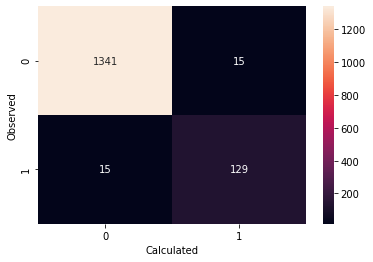

In [249]:
draw_cm(y_test, y_pred)

In [250]:
DT_y_predict_prob = DT_model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, DT_y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,DT_y_predict_prob)

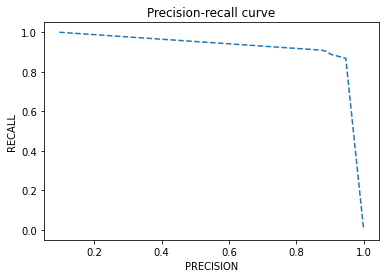

In [251]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for Decision Tree Classifier')

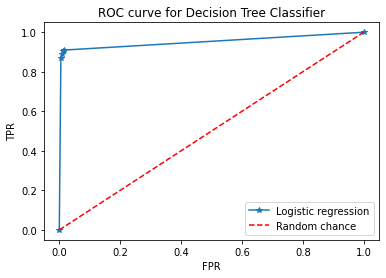

In [252]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Decision Tree Classifier')

In [253]:
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test,y_pred))
print('Auc of ROC Curve: ',auc(fpr,tpr))
print('Auc of precision & recall: ',auc(recall,precision))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

precision: 0.8958333333333334
recall: 0.8958333333333334
Accuracy:  0.98
Log loss:  0.6907835238725165
Auc of ROC Curve:  0.9515834972140282
Auc of precision & recall:  0.9266142717572211
Mean Squared Error (MSE):  0.02
Mean Absolute Error (MAE):  0.02
F1 Score:  0.8958333333333334


In [254]:
DT_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

In [255]:
DT_list

[0.896, 0.896, 0.896, 0.98, 0.02]

In [256]:
# Classification Report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      1356
     class 1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Random Forest Classifier Algorithm

In [271]:
RF_model = RandomForestClassifier(max_depth=8, random_state=0, n_estimators = 500)
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=0)

In [272]:
y_pred=RF_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [273]:
RF_model.score(X_test,y_test)

0.9873333333333333

#### For Random Forest Classifier 

In [274]:
print('Training Accuracy is ',round(RF_model.score(X_train, y_train)*100, 2),
      '% \nTest Accuracy is ', round(RF_model.score(X_test, y_test)*100, 2),'%')

Training Accuracy is  99.54 % 
Test Accuracy is  98.73 %


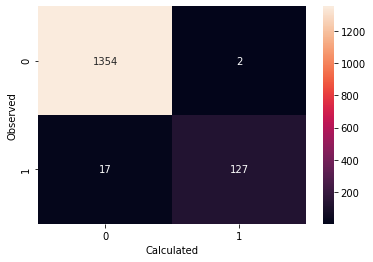

In [275]:
draw_cm(y_test, y_pred)

In [276]:
RF_y_predict_prob = RF_model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, RF_y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,RF_y_predict_prob)

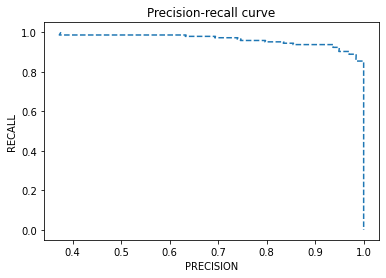

In [277]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for Random Forest Classifier')

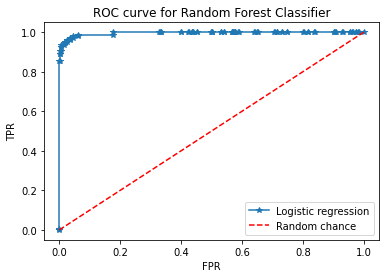

In [278]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Random Forest Classifier')

In [283]:
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test,y_pred))
print('Auc of ROC Curve: ',auc(fpr,tpr))
print('Auc of precision & recall: ',auc(recall,precision))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

precision: 0.9844961240310077
recall: 0.8819444444444444
Accuracy:  0.9873333333333333
Log loss:  0.43749223379877655
Auc of ROC Curve:  0.9955957063257949
Auc of precision & recall:  0.9766183709914592
Mean Squared Error (MSE):  0.012666666666666666
Mean Absolute Error (MAE):  0.012666666666666666
F1 Score:  0.9304029304029303


In [284]:
RF_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

In [285]:
RF_list

[0.984, 0.882, 0.93, 0.987, 0.013]

In [286]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99      1356
     class 1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Naive Bayes

In [287]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [288]:
y_pred = NB_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [289]:
NB_model.score(X_test,y_test)

0.9133333333333333

#### For Naive Bayes

In [290]:
print('Training Accuracy is ',round(NB_model.score(X_train, y_train)*100, 2),
      '% \nTest Accuracy is ', round(NB_model.score(X_test, y_test)*100, 2),'%')

Training Accuracy is  90.86 % 
Test Accuracy is  91.33 %


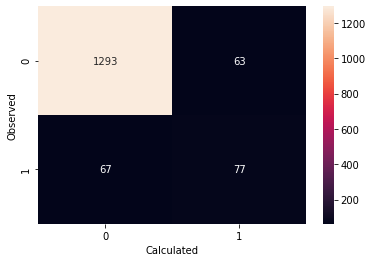

In [291]:
draw_cm(y_test, y_pred)

In [292]:
NB_y_predict_prob = NB_model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, NB_y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,NB_y_predict_prob)

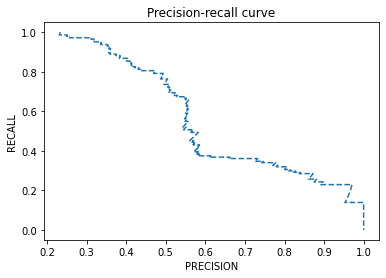

In [293]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for Naive Bayes')

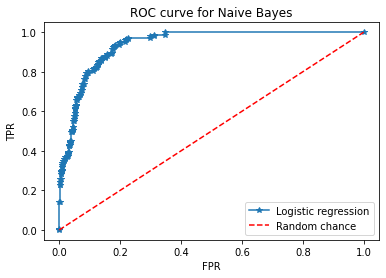

In [294]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Naive Bayes')

In [295]:
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test,y_pred))
print('Auc of ROC Curve: ',auc(fpr,tpr))
print('Auc of precision & recall: ',auc(recall,precision))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

precision: 0.55
recall: 0.5347222222222222
Accuracy:  0.9133333333333333
Log loss:  2.9933942039843275
Auc of ROC Curve:  0.9393026876433956
Auc of precision & recall:  0.6462680598386872
Mean Squared Error (MSE):  0.08666666666666667
Mean Absolute Error (MAE):  0.08666666666666667
F1 Score:  0.5422535211267606


In [296]:
NB_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

In [297]:
NB_list

[0.55, 0.535, 0.542, 0.913, 0.087]

In [298]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95      1356
     class 1       0.55      0.53      0.54       144

    accuracy                           0.91      1500
   macro avg       0.75      0.74      0.75      1500
weighted avg       0.91      0.91      0.91      1500



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## KNN Algorithm

In [299]:
knn_model = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [300]:
y_pred=knn_model.predict(X_test)

In [301]:
knn_model.score(X_train, y_train), knn_model.score(X_test,y_test)

(0.9442857142857143, 0.9453333333333334)

#### For KNN model,

In [302]:
print('Training Accuracy is ',round(knn_model.score(X_train, y_train)*100, 2),
      '% \nTest Accuracy is ', round(knn_model.score(X_test, y_test)*100, 2),'%')

Training Accuracy is  94.43 % 
Test Accuracy is  94.53 %


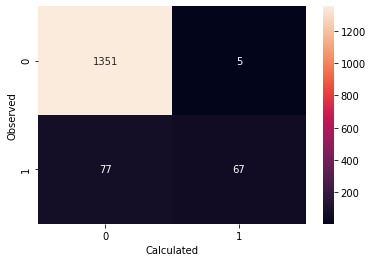

In [303]:
draw_cm(y_test, y_pred)

In [304]:
knn_y_predict_prob = knn_model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, knn_y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,knn_y_predict_prob)

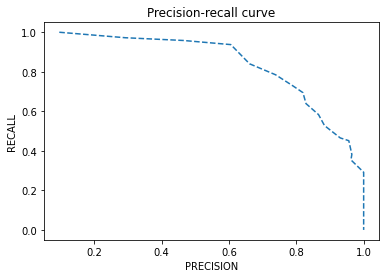

In [305]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for KNN')

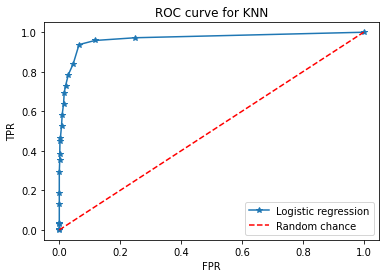

In [306]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for KNN')

In [307]:
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test,y_pred))
print('Auc of ROC Curve: ',auc(fpr,tpr))
print('Auc of precision & recall: ',auc(recall,precision))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

precision: 0.9305555555555556
recall: 0.4652777777777778
Accuracy:  0.9453333333333334
Log loss:  1.8881224415798852
Auc of ROC Curve:  0.9661227876106195
Auc of precision & recall:  0.8503465109599891
Mean Squared Error (MSE):  0.05466666666666667
Mean Absolute Error (MAE):  0.05466666666666667
F1 Score:  0.6203703703703703


In [308]:
KNN_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

In [309]:
KNN_list

[0.931, 0.465, 0.62, 0.945, 0.055]

In [310]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97      1356
     class 1       0.93      0.47      0.62       144

    accuracy                           0.95      1500
   macro avg       0.94      0.73      0.80      1500
weighted avg       0.94      0.95      0.94      1500



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Neural Networks

In [320]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
nn_model = Sequential()

nn_model.add(Dense(12, input_dim=10, activation='relu'))

nn_model.add(Dense(8, activation='relu'))

nn_model.add(Dense(1, activation='sigmoid'))

# compile the keras model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
nn_model.fit(X_train, y_train, epochs=150, validation_split=0.1, batch_size=32)

# evaluate the keras model
_, accuracy = nn_model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
99/99 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.8035 - val_loss: 0.4016 - val_accuracy: 0.9000
Epoch 2/150
99/99 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.9044 - val_loss: 0.2733 - val_accuracy: 0.9000
Epoch 3/150
99/99 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9044 - val_loss: 0.2280 - val_accuracy: 0.9000
Epoch 4/150
99/99 [==============================] - 0s 3ms/step - loss: 0.2204 - accuracy: 0.9044 - val_loss: 0.2014 - val_accuracy: 0.9000
Epoch 5/150
99/99 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9044 - val_loss: 0.1811 - val_accuracy: 0.9000
Epoch 6/150
99/99 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9044 - val_loss: 0.1672 - val_accuracy: 0.9000
Epoch 7/150
99/99 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9044 - val_loss: 0.1571 - val_accuracy: 0.9000
Epoch 8/150
9

Epoch 59/150
99/99 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0652 - val_accuracy: 0.9800
Epoch 60/150
99/99 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0646 - val_accuracy: 0.9800
Epoch 61/150
99/99 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9829 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 62/150
99/99 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9832 - val_loss: 0.0657 - val_accuracy: 0.9771
Epoch 63/150
99/99 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9838 - val_loss: 0.0651 - val_accuracy: 0.9771
Epoch 64/150
99/99 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9835 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 65/150
99/99 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0629 - val_accuracy: 0.9800
Epoch 

#### For a Neural Network

In [321]:
y_pred = nn_model.predict(X_test)
print('Training Accuracy is ',round(nn_model.evaluate(X_train, y_train)[1]*100, 2),
      '% \nTest Accuracy is ', round(nn_model.evaluate(X_test, y_test)[1]*100, 2),'%')

47/47 [==============================] - 0s 733us/step - loss: 0.0591 - accuracy: 0.9800
Training Accuracy is  98.89 % 
Test Accuracy is  98.0 %


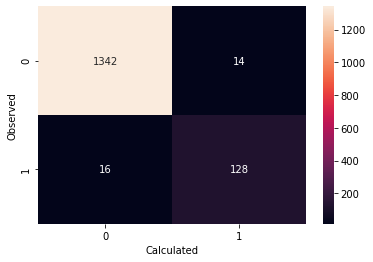

In [322]:
y_pred =(y_pred>0.5)
draw_cm(y_test, y_pred)

In [323]:
nn_y_predict_prob = nn_model.predict(X_test)

[fpr,tpr,thr] = roc_curve(y_test, nn_y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,nn_y_predict_prob)

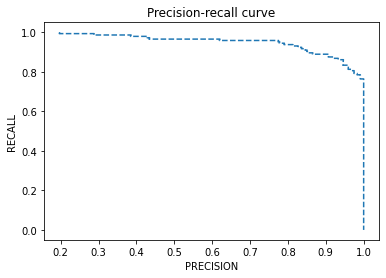

In [324]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for Neural Networks')

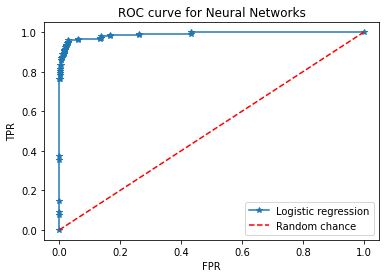

In [325]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Neural Networks')

In [326]:
NN_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

In [327]:
NN_list

[0.901, 0.889, 0.895, 0.98, 0.02]

In [328]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      1356
     class 1       0.90      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## SVM

In [329]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(y_pred)
svm_model.score(X_train, y_train), svm_model.score(X_test, y_test)

[1 0 0 ... 0 0 0]


(0.9794285714285714, 0.9766666666666667)

#### For a SVM model

In [330]:
print('Training Accuracy is ',round(svm_model.score(X_train, y_train)*100, 2),
      '% \nTest Accuracy is ', round(svm_model.score(X_test, y_test)*100, 2),'%')

Training Accuracy is  97.94 % 
Test Accuracy is  97.67 %


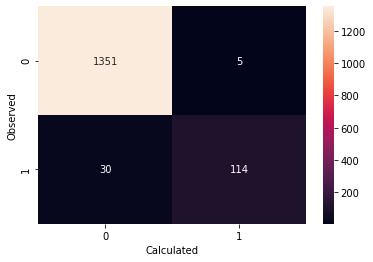

In [331]:
draw_cm(y_test, y_pred)

In [332]:
svm_y_predict_prob = svm_model.predict(X_test)

[fpr,tpr,thr] = roc_curve(y_test, svm_y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,svm_y_predict_prob)

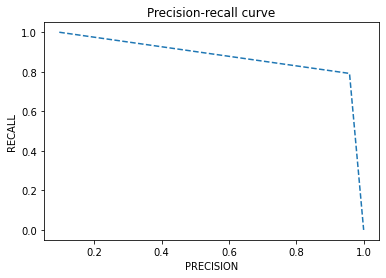

In [333]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for SVM')

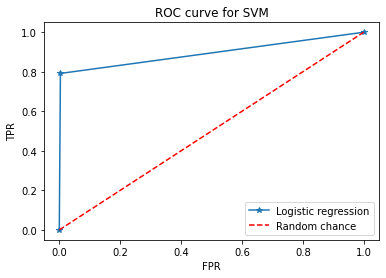

In [334]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for SVM')

In [335]:
SVM_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

In [336]:
SVM_list

[0.958, 0.792, 0.867, 0.977, 0.023]

In [337]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99      1356
     class 1       0.96      0.79      0.87       144

    accuracy                           0.98      1500
   macro avg       0.97      0.89      0.93      1500
weighted avg       0.98      0.98      0.98      1500



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Gradient Boosting Classifier

In [338]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print(y_pred)
gb_model.score(X_train, y_train), gb_model.score(X_test, y_test)


[1 0 0 ... 0 0 0]


(0.9957142857142857, 0.986)

#### For Gradient Boosting Classifier

In [339]:
print('Training Accuracy is ',round(gb_model.score(X_train, y_train)*100, 2),
      '% \nTest Accuracy is ', round(gb_model.score(X_test, y_test)*100, 2),'%')

Training Accuracy is  99.57 % 
Test Accuracy is  98.6 %


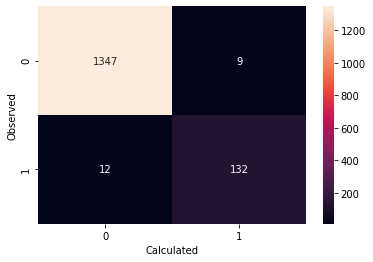

In [340]:
draw_cm(y_test, y_pred)

In [341]:
gb_y_predict_prob = gb_model.predict(X_test)

[fpr,tpr,thr] = roc_curve(y_test, gb_y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,gb_y_predict_prob)

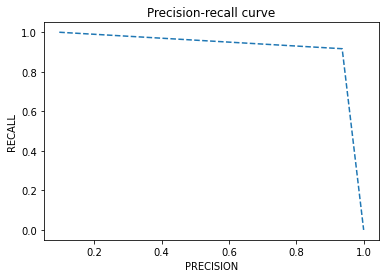

In [342]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for Gradient Boosting Classifier')

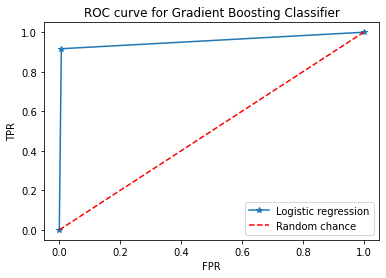

In [343]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Gradient Boosting Classifier')

In [344]:
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test,y_pred))
print('Auc of ROC Curve: ',auc(fpr,tpr))
print('Auc of precision & recall: ',auc(recall,precision))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

precision: 0.9361702127659575
recall: 0.9166666666666666
Accuracy:  0.986
Log loss:  0.48354766711333164
Auc of ROC Curve:  0.9550147492625368
Auc of precision & recall:  0.930418439716312
Mean Squared Error (MSE):  0.014
Mean Absolute Error (MAE):  0.014
F1 Score:  0.9263157894736843


In [345]:
GB_list = [round(precision_score(y_test,y_pred), 3), round(recall_score(y_test,y_pred), 3), round(f1_score(y_test, y_pred), 3), round(accuracy_score(y_test, y_pred), 3), round(mean_squared_error(y_test, y_pred), 3)]

In [346]:
GB_list

[0.936, 0.917, 0.926, 0.986, 0.014]

In [347]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      1356
     class 1       0.94      0.92      0.93       144

    accuracy                           0.99      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.99      0.99      0.99      1500



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Overall Metric Evaluation Report

In [348]:
from IPython.display import HTML, display
import tabulate
table=[
       ["Logistic Regression"]+[str(i) for i in log_list],
      ["Decision Tree"]+[str(i) for i in DT_list],
      ["Random Forest"]+[str(i) for i in RF_list],
      ["Naive Bayes"]+[str(i) for i in NB_list],
      ["KNN"]+[str(i) for i in KNN_list],
      ["Neural Networks"]+[str(i) for i in NN_list],
      ["SVM"]+[str(i) for i in SVM_list],
      ["Gradient Boosting Classifier"]+[str(i) for i in GB_list]]
display(HTML(tabulate.tabulate(table, tablefmt="html", headers = (["Algorithms  ", "Precision", "Recall", "F1_Score", "Accuracy", "MSE"]))))

# 9. Business Report:

## Title:  Marketing Campaign for Banking Products

###  Domain: Banking

## Objective: 
- The classification goal is to predict the likelihood of a liability customer buying personal loans.
- This means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset.
- Considering the Constraints, Supervised Learning methods like Logistic Regression, Naive Bayes Algorithm, Decision Tree Classifier, Random Forest Classifier, KNN Algorithm, Gradient Boosting Algorithm and Neural Networks have been trained to Predictwhich model is best for this Problem.

### Learning Outcomes:
- Data Visualization
- Data Cleaning
- Exploratory Data Analysis
- Preparing the data to train a model.
- Training and making Predictions using various Classification Algorithms
- Metrics Evaluation
- Choosing the Best Model

## Insights from Data:

#### Data Along with its Attributes:

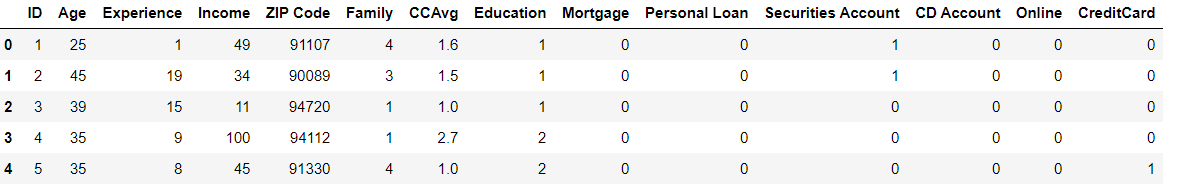

The following image contains the data of first 5 Training examples which has been imported using head() function.

### Understanding features from above DataFrame

- Target Variable - Personal Loan which describe whether the person has taken loan or not.
Nominal Variables:
- ID - Customer ID
- ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

Ordinal Categorical variables:
- Family - Number of family member of the customer
- Education - Education level of the customer.Ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectively.

Interval Variables:
- Age - Age of the customer
- Experience - Years of experience of customer has
- Income - Annual Income of the customer which is in dollars
- CCAvg - Avg. spending on credit cards per month which in dollars.
- Mortgage - Value of House Mortgage

Binary Categorical Variable :
- CD Account - Does the customer have CD Account with bank or not?
- Security Account - Does the customer have Security Account with bank or not?
- Online - Does the customer have Online banking facility with bank or not?
- Credit Card - Does the customer have a credit card issued by Universal Bank or not?
- Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

## Insights of Data Cleaning

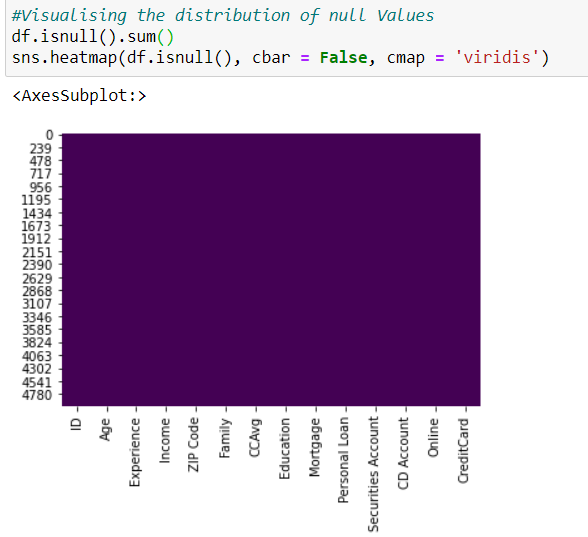

- The above plot tells that there are no null values in the data.
- Null values have been found using heatmap as well as isnull().

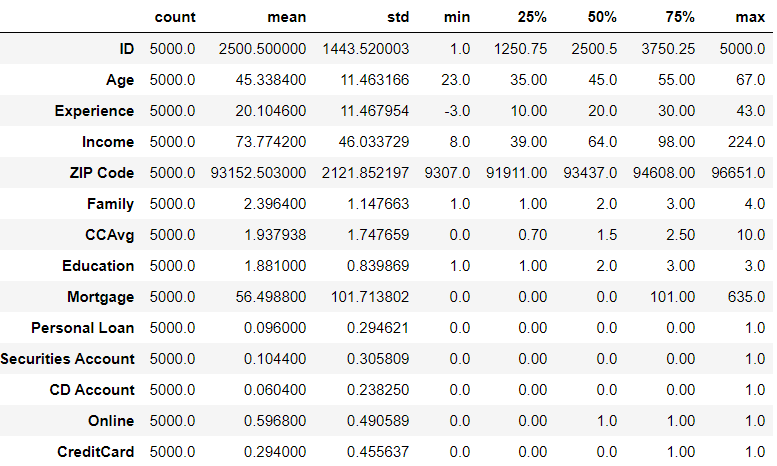



- Binary varibales 'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account' has clean data.
- Ordinary Category variables 'Familty' and 'Education' are also clean.
- Target variable also looks fine

- Minumum value of Experience column is -3.0 which could be a mistake because Experience cannot be negative.

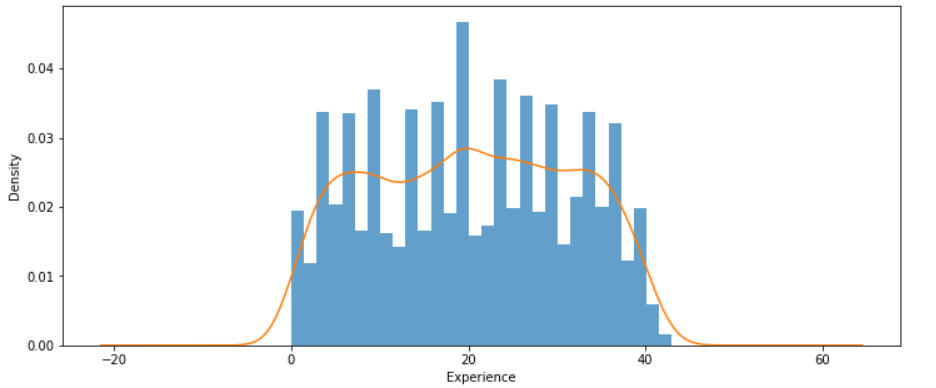



- We have found negative values for attribute 'Experience' in the given dataset
- There are 52 such values less than 0, namely 33 of them are -1, 15 of them are -2 and 4 are of them are -3.
- So, we consider experience to be greater than or equal to 0 and hence we clean it and make them 0

## Insights from EDA:
 
#### Only the main Observations have been noted in the report.

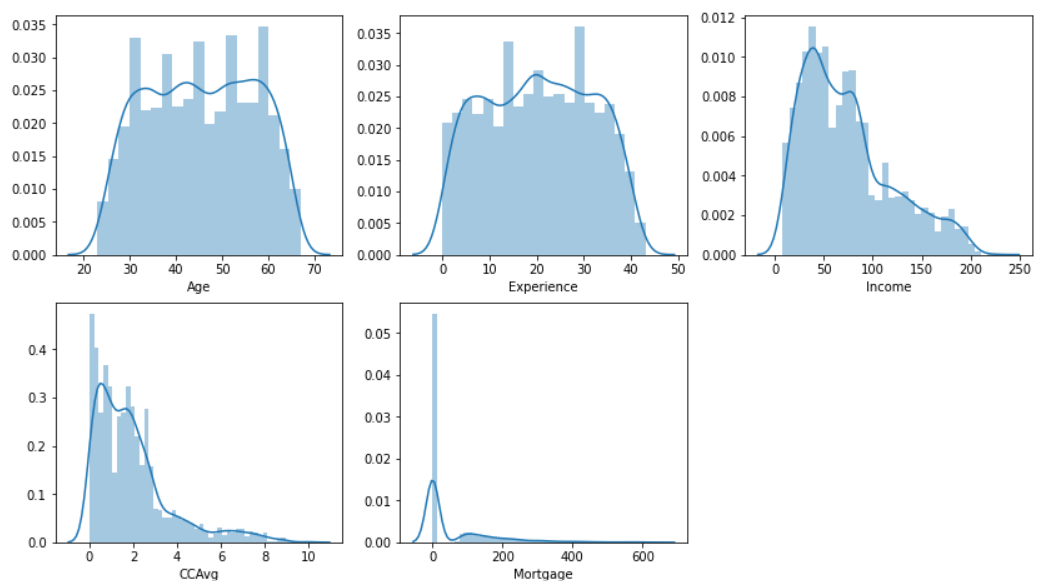

Following Observations can be inferred from the above Distribution Plots:
  - Age: The distribution is even across mean and hence normally distributed.
  - Experience: Even distribution across mean and hence normally distributed.
  - Income: Positively skewed that is median is lesser than the mean value.
  - CCAvg: Positively skewed that is median is lesser than the mean value.
  - Mortgage: Positively skewed that is median is lesser than the mean value.

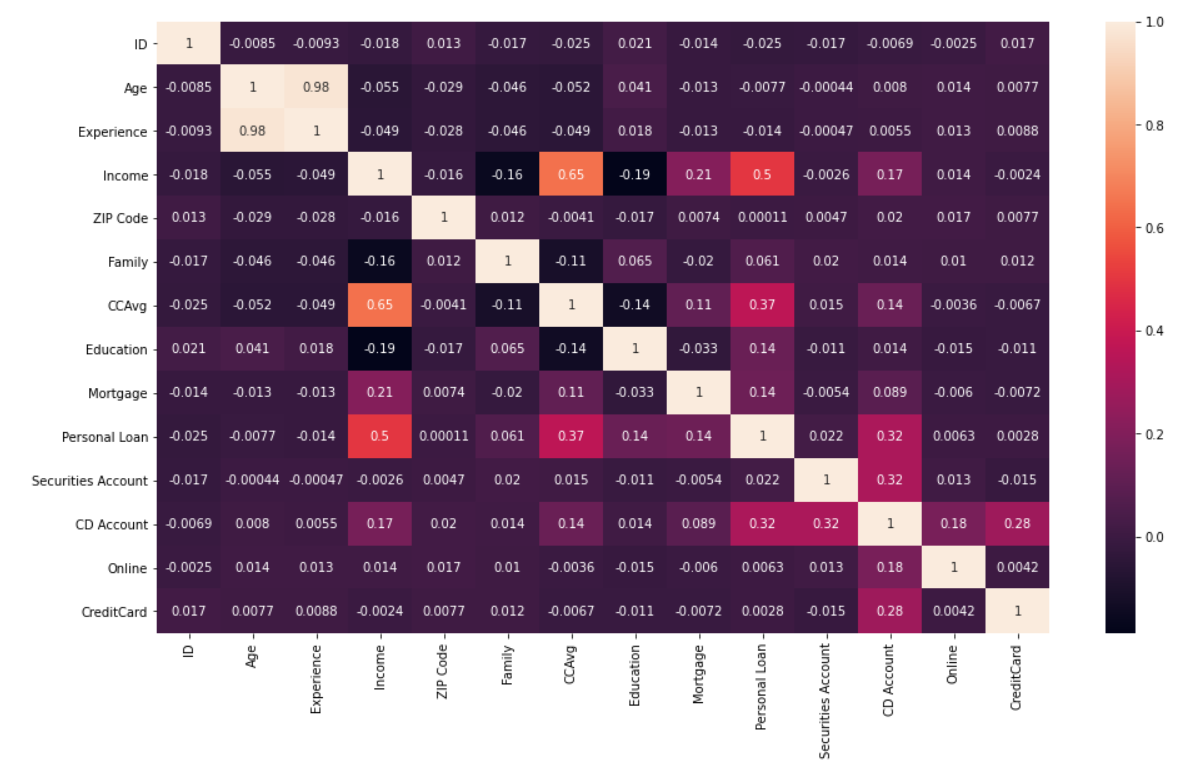

Following Observations can be inferred from the above Correlation Matrix
  - Experience and Age are highly correlated with eachother.
  - Income and CCAvg are moderately correlated with each other.

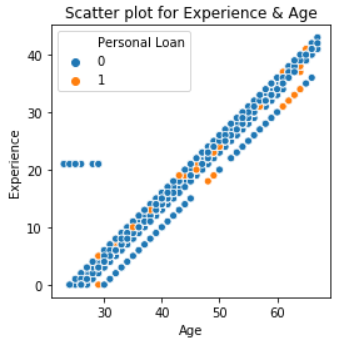

Scatter plot has been plotted between Experience and Age and following results have been found:
- Experience & Age are highly positively correlated.(i.e as age increases experience also increases)
- There is gap in the mid forties of age and also more people in the under graduate level
- One feature among Experience and age can be removed to avoid multi-collinearity issue


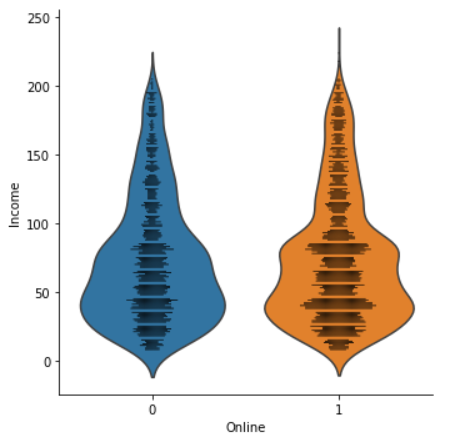

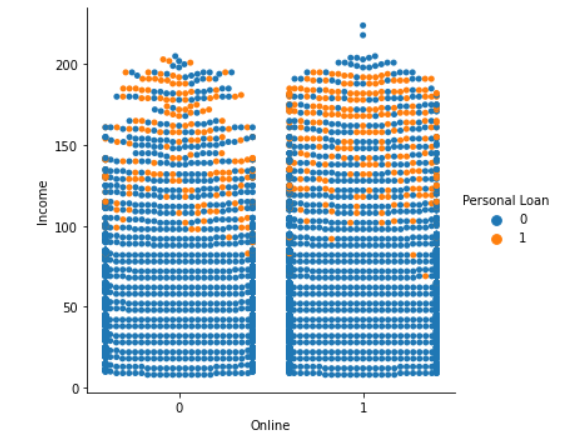
Above plots have been plotted between features (online vs income). Following Observations have been inferred.
   - majority of income earned is around 50 and income with more than 100 is more likely to get a loan

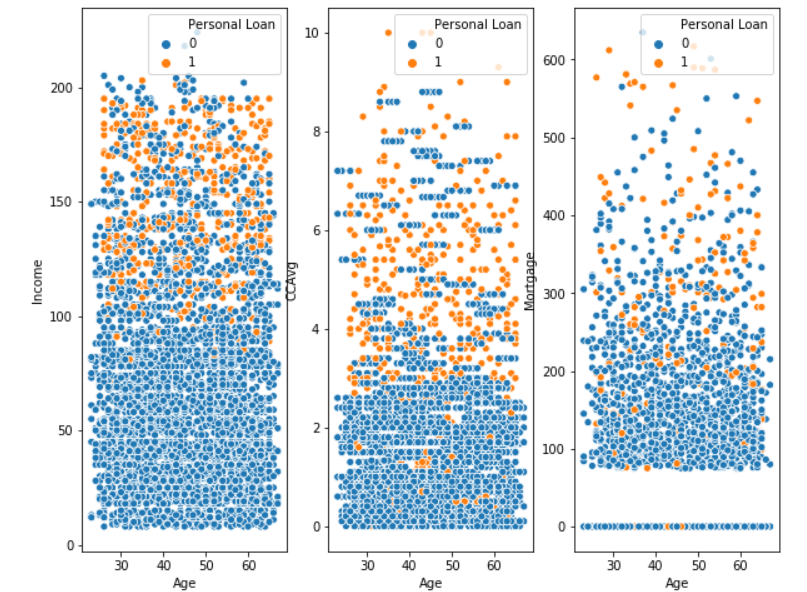

Scatter plots have been plotted and following observations have been inferred:
 - Age v/s Income: People with more income (>100) seems to have opted for Personal Loan.

 - Age v/s CCAvg: Also people with high CCAvg seems to have opted for Personal Loan.

 - Age v/s Mortgage: People who have opted for Personal Loan are not much related with higher Mortgage value but people with Mortgage value greater than 400 dollars seems to have taken Personal Loan.

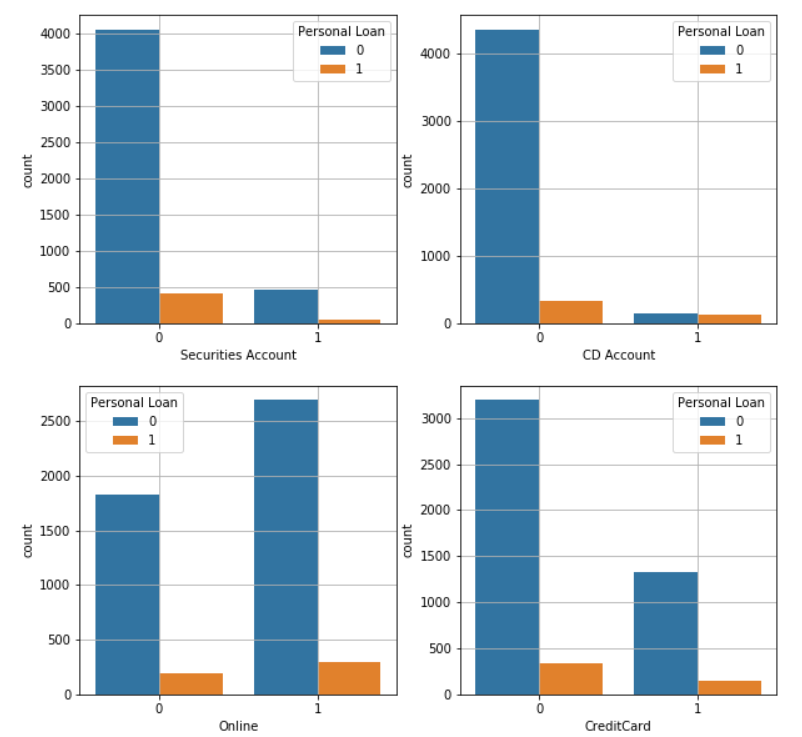

Count plots have been plotted between various features with personal loan and following observations have been inferred:
 - People without the CD Accounts tend to have taken more Personal Loan. 
 -  People with more Online accounts seem to take more Personal Loan
 -  Very minimal number of people who have Securities Account have opted the Personal Loan.
 -  Most of the people with the CreditCard seems to have not taken the Personal Loan.

## Actions Performed Under Feature Transformations:

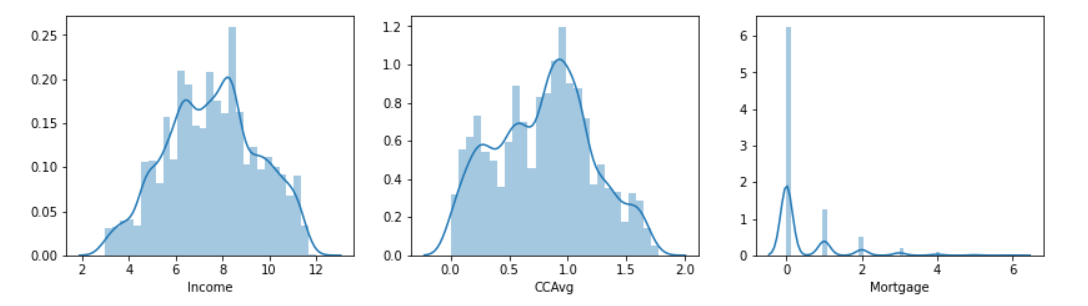

- From the Distribution plot obtained in the EDA, Features like Income, CCAvg, Mortgage have been found positively skewed.
- So, Features have been power Transformed using 'yeo-johnson' transform.
- Transformed to normal Distributed features.


## Actions Performed Under Training The model.

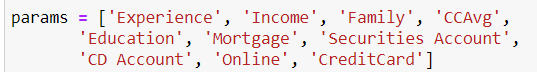


#### Features Removed:
 - ID: Since it has very less correlation value with the target column.
 - Age: Features Age and Experience are highly correlated. Hence, to avoid multi-collinearity issues, Age has been removed.
 - ZIPCode: It is nominal data and since it has very large no. of unique values(467),it is not appropriate to One Hot Encode them.


Features have been standarised using StandardScaler() which brings the data to a mean with 0 and standard deviation of 1.

With the help of train_test_split module in sklearn, data has been split into train and test sets and fed into a classification model. 

## Insights Obtained from Analysis of Various Classification Algorithms

I have used following classification algorithms inorder to predict the potential customers having higher probability of purchasing a loan:


- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Naive Bayes Classifier
- K Nearest Neighbors
- Neural Networks
- Support Vector Machines
- Gradient Boosting classifier

### 1. Logistic Regression

On training the model with Logistic Regression, we have the following observations

#### Confusion Matrix

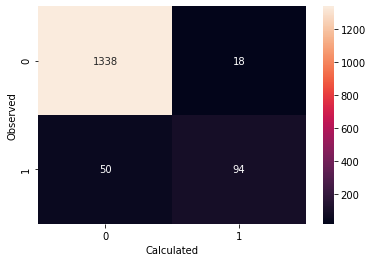

On applying Logistic Regression, following results were obtained

- Precision Score : 0.839 
- Recall Score    : 0.653 
- F1 Score        : 0.734	
- Accuracy        : 0.955	

From the above Confusion Matrix and the metrics obtained, there are 50 false negatives and its a fair model and can be improvised.

### 2. Decision Tree Classifier

Training the model with Decision Tree Classifier has resulted in following Observations.

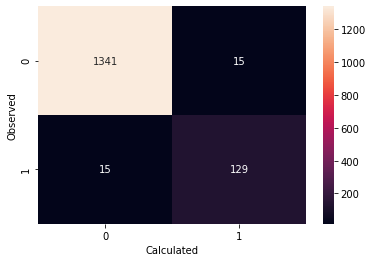

On applying Decision Tree Classifier, following results were obtained

- Precision Score : 0.896			
- Recall Score    : 0.896 
- F1 Score        : 0.896	
- Accuracy        : 0.98	

The Decision Tree classifier has done a good job and gave an accuracy of 98% and F1 score of 0.896

### 3. Random Forest

Random Forest Classifier yielded us the following results

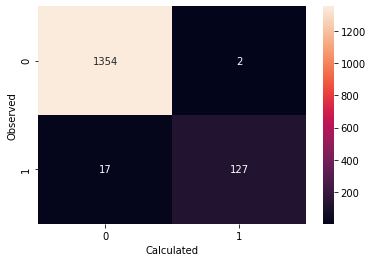

On applying Random Forest Classifier, following results were obtained

- Precision Score : 0.984					
- Recall Score    : 0.882
- F1 Score        : 0.93	
- Accuracy        : 0.987

On Observing the above values and the number of false negatives, Random Forest has done an excellent job with accuracy of 98.7% and F1 score of 0.93

### 4. Naive Bayes 

On applying Naive Bayes Classifier to the given data, following results were obtained

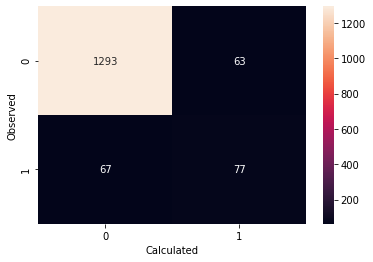

On applying Naive Bayes Classifier, following results were obtained

- Precision Score : 0.55						
- Recall Score    : 0.535
- F1 Score        : 0.542	
- Accuracy        : 0.913	

From the above results, it can be noted that the accuracy was only 91.3% and there are 67 False Negatives. Since the dataset has 91% of negative examples and only few positive examples, the model hasn't leanrt much well and hence this is a poor model

### 5. KNN

KNN gives following results

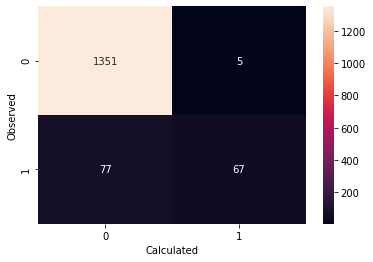

On applying KNN algorithm, following results were obtained

- Precision Score : 0.931			
- Recall Score    : 0.465
- F1 Score        : 0.62	
- Accuracy        : 0.945	

KNN yields us a decent accuracy score of 94.5% but the F1 score is very low(0.62) as compared to other models. Model can be still improvised by using other algorithms

### 6. Neural Networks

On building a Neural Network for this model, the results obtained are as follows

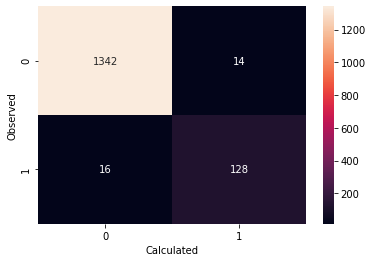

Neural Network with two hidden layers and one input and one output layer yields following results

- Precision Score : 0.901								
- Recall Score    : 0.889
- F1 Score        : 0.895	
- Accuracy        : 0.98	

Neural Network has resulted in a good accuracy of 98% and F1 score of 0.895

### 7. Support Vector Machines

On applying SVM, results obtained were as follows

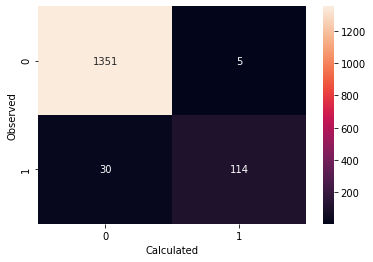

SVM classifier yielded following results 

- Precision Score : 0.958										
- Recall Score    : 0.792
- F1 Score        : 0.867	
- Accuracy        : 0.977

Accuracy of 97.7% and F1 Score of 0.87 are pretty good results obtained by SVM

### 8. Gradient Boosting Classifier

Gradient Boosting Classifier gave following results

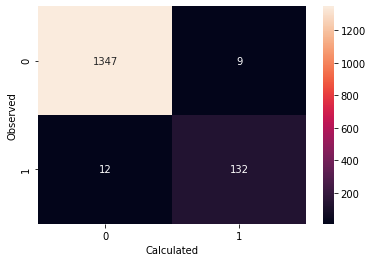

Gradient Boosting classifier yielded following results 

- Precision Score : 0.936														
- Recall Score    : 0.917
- F1 Score        : 0.926	
- Accuracy        : 0.986

This algorithm is one of the best algorithm that has fit the dataset well and gave a good test set accuracy and a decent F1 score and the lowest number of False Negatives(12)

## Metric Evaluation Report

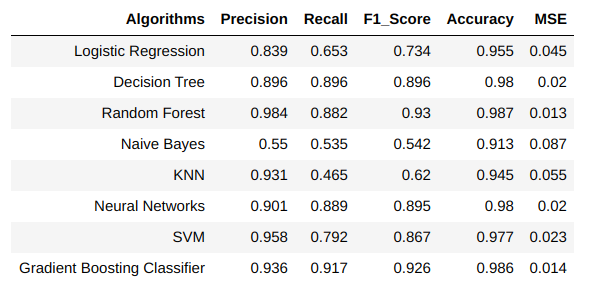

## Based Fitted Models based on Individual metric

1. Precision : Random Forest Classifier (0.984)
2. Recall    : Gradient Boosting Classifier (0.917)
3. F1_Score  : Random Forest Classifier (0.926)
4. Accuracy  : Random Forest Classifier (0.987)
5. MSE       : Random Forest Classifier (0.013)

From the above results, it can be observed that both Random Forest Classifier and Gradient Boosting Classifier are performing well. 

### I prefer choosing Random Forest Classifier as my 1st Choice because of following 

### 1. Higher Precision (0.984) 

### 2. High F1 Score (0.926)

### 3. Highest Accuracy (98.7%)

### 4. Decent Number of False Negatives (17)

## Best Fitted Model : Random Forest Classifier.

## Conclusion:
Machine Learning Approaches are being applied in various domains in today's technology driven society. It has made a huge impact in various sectors like medical, banking, automation, etc.. Similarly I hope this Machine Learning model helps in increasing the success ratio while at the same time reduce the cost of this Marketing campaign for banking products.